# MIDTERM
Name: Jordan Wolf
<br>
Date: 08/20/2022 
<br>
You will be doing an intensive analysis of consumer behavioral, applying techniques ranging from supervised, unsupervised learning, as well as semi-supervised learning.


# Data

The data is in `dat/online_shoppers_intention.csv.gz`, from [Online Shoppers Purchasing Intention Dataset](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset)

- The dataset consists of 10 numerical and 8 categorical variables.
- Variable `Revenue` is the target label. This binary variable is imbalanced, specifically 84.5% of user journeys did NOT result in a purchase; in other words `Revenue` is False.
- `Administrative`, `Administrative Duration`, `Informational`, `Informational Duration`, `Product Related`, and `Product Related Duration` represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. 
- The values of these features are derived from the URL information of the pages visited by the user and updated when a user takes an action, e.g, moving from one page to another. 
- Features `Bounce Rate`, `Exit Rate` and `Page Value` represent  metrics measured by Google Analytics for each page in the e-commerce site. 
- The value of `Bounce Rate` for a web page refers to the percentage of visitors who enter the site from that page and then leave (i.e., bounce) without triggering any other requests to the analytics server during that session. 
- The value of `Exit Rate` for a specific web page is calculated as for all page views to the page and it represents the percentage that the page was seen in the last session. 
- Feature `Page Value` represents the average value for a web page that a user visited before completing an e-commerce transaction. 
- Feature `Special Day` indicates the closeness of the site visiting time to a specific special day (e.g., Mother’s Day or Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. 
- The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a boolean value indicating whether the date of the visit is weekend, and month of the year.

### Definitions:
- Target variable - variable whose values are modeled and predicted by other variables
- Predictor varibale - variable whose values will be used to predict the value of the target variable
- Univariate analysis - Univariate analysis explores each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It describes the pattern of response to the variable. It describes each variable on its own.
- Bivariate analysis - means the analysis of bivariate data. It is one of the simplest forms of statistical analysis, used to find out if there is a relationship between two sets of values. It usually involves the variables X and Y.
    - Univariate analysis is the analysis of one (“uni”) variable.
    - Bivariate analysis is the analysis of exactly two variables.
    - Multivariate analysis is the analysis of more than two variables.
- Logistic regression estimates the probability of an event occurring, such as voted or didn’t vote, based on a given dataset of independent variables. Since the outcome is a probability, the dependent variable is bounded between 0 and 1.

### Notes:
- Separate predictor variables from target variable to setup model

# Tasks
## Task 1. Classification (50 points)

Build a predictive classification model using data entries corresponding to the months of June—December as training set, and those corresponding to February—March as test set. 

More specifically,

1. Fit a logistic regression and at least one other classification model. Find and explain important features. 
1. Report and interpret the most meaningful classifications metrics
1. Show and explain the hyper-parameter fitting process.

Point breakdown:

- (10 points) Basic exploratory data analysis (EDA) 
    - Appropriate univariate descriptive statistics and figures
    - Appropriate bi-variate descriptive statistics and figures
- ( 5 points) Advanced EDA
    - Free-response, shows us what they know! 
- ( 5 points) Train/test split
- (10 points) Feature selection
- (15 points) Model fitting
- ( 5 points) Performance points 

### Imports:

In [154]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load Data into Dataframe:

In [2]:
df = pd.read_csv('dat/online_shoppers_intention.csv.gz')
df.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


#### Get Dataframe Types

In [3]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

### Create copy of Dataframe to preserve original dataframe

In [4]:
df_work = df.copy()
df_work.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


### Is there missing data in the dataframe?

In [5]:
df.isna().any()

Administrative             False
Administrative_Duration    False
Informational              False
Informational_Duration     False
ProductRelated             False
ProductRelated_Duration    False
BounceRates                False
ExitRates                  False
PageValues                 False
SpecialDay                 False
Month                      False
OperatingSystems           False
Browser                    False
Region                     False
TrafficType                False
VisitorType                False
Weekend                    False
Revenue                    False
dtype: bool

In [6]:
df.shape

(12330, 18)

### Split Dataframe into Test and Train Dataframes:
Build a predictive classification model using data entries corresponding to the months of June—December as training set, and those corresponding to February—March as test set

In [7]:
df_t0 = df[df['Month'] == 'Feb']
df_t1 = df[df['Month'] == 'Mar']
df_test = pd.concat([df_t0, df_t1])

In [8]:
df_test.shape

(2091, 18)

In [9]:
df_test

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2086,1,78.0,0,0.0,21,555.894444,0.00,0.002381,24.750476,0.0,Mar,1,1,1,2,New_Visitor,False,True
2087,0,0.0,0,0.0,19,429.633333,0.00,0.005263,0.000000,0.0,Mar,2,4,1,3,Returning_Visitor,True,False
2088,0,0.0,0,0.0,10,111.000000,0.00,0.020000,0.000000,0.0,Mar,2,4,7,3,Returning_Visitor,False,False
2089,0,0.0,0,0.0,1,0.000000,0.20,0.200000,0.000000,0.0,Mar,3,2,1,3,Returning_Visitor,True,False


In [10]:
df_test.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,2091.000000,2091.000000,2091.000000,2091.000000,2091.000000,2091.000000,2091.000000,2091.000000,2091.000000,2091.000000,2091.000000,2091.000000,2091.000000,2091.000000
mean,1.769488,66.448115,0.391200,28.184538,19.049737,782.252683,0.023954,0.047200,3.689593,0.020564,2.064562,2.281683,3.000956,3.142994
std,2.780218,167.300840,1.179976,115.613729,22.883550,1102.819418,0.054888,0.054111,13.780388,0.113820,0.762232,1.402849,2.331806,2.972300
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000176,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,5.000000,119.166667,0.000000,0.013333,0.000000,0.000000,2.000000,2.000000,1.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,12.000000,412.000000,0.000000,0.025541,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000
75%,3.000000,64.000000,0.000000,0.000000,25.000000,1043.672619,0.014286,0.052566,0.000000,0.000000,2.000000,2.000000,4.000000,3.000000
max,24.000000,2047.234848,16.000000,1467.000000,328.000000,12983.787710,0.200000,0.200000,261.491286,1.000000,7.000000,10.000000,9.000000,15.000000


In [11]:
df_train = df.copy()

In [12]:
df_train.drop(df[df['Month'] == 'Feb'].index, inplace = True)
df_train.drop(df[df['Month'] == 'Mar'].index, inplace = True)
df_train.drop(df[df['Month'] == 'May'].index, inplace = True)

In [13]:
df_train

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
5455,0,0.000000,0,0.0,1,207.570248,0.000000,0.007937,0.000000,0.0,Oct,2,2,1,5,Returning_Visitor,False,False
5456,3,40.200000,0,0.0,11,201.133333,0.000000,0.020000,0.000000,0.0,June,2,2,2,1,New_Visitor,False,False
5457,1,63.400000,0,0.0,3,120.400000,0.000000,0.000000,42.293068,0.0,Oct,1,1,3,3,New_Visitor,False,True
5458,6,618.066667,0,0.0,50,1342.083333,0.000000,0.004386,28.068050,0.0,June,2,2,6,11,New_Visitor,False,True
5459,0,0.000000,0,0.0,2,7.000000,0.000000,0.100000,0.000000,0.0,June,2,2,7,1,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.000000,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.000000,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.000000,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.000000,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [14]:
df_train.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,6875.000000,6875.000000,6875.000000,6875.000000,6875.000000,6875.000000,6875.000000,6875.000000,6875.000000,6875.0,6875.000000,6875.000000,6875.000000,6875.000000
mean,2.652509,90.741434,0.576727,39.961299,38.154327,1424.355240,0.019368,0.038991,6.782225,0.0,2.144000,2.374255,3.197964,4.152145
std,3.558866,185.024829,1.334415,155.978115,52.393435,2231.381312,0.044370,0.044806,20.573444,0.0,1.006485,1.868924,2.473531,4.326217
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,224.779167,0.000000,0.013800,0.000000,0.0,2.000000,2.000000,1.000000,2.000000
50%,1.000000,22.000000,0.000000,0.000000,21.000000,710.066667,0.003371,0.024226,0.000000,0.0,2.000000,2.000000,3.000000,2.000000
75%,4.000000,107.800000,0.000000,0.000000,45.000000,1746.904342,0.015187,0.042486,0.000000,0.0,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,14.000000,2549.375000,686.000000,63973.522230,0.200000,0.200000,361.763742,0.0,8.000000,13.000000,9.000000,20.000000


### Remove non-numeric values from df_work

In [15]:
result = df_work.select_dtypes(include='number')
result

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,1,1,1,1
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,1,2
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,4,1,9,3
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,3,2,2,4
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,3,3,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,4,6,1,1
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,3,2,1,8
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,3,2,1,13
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,2,2,3,11


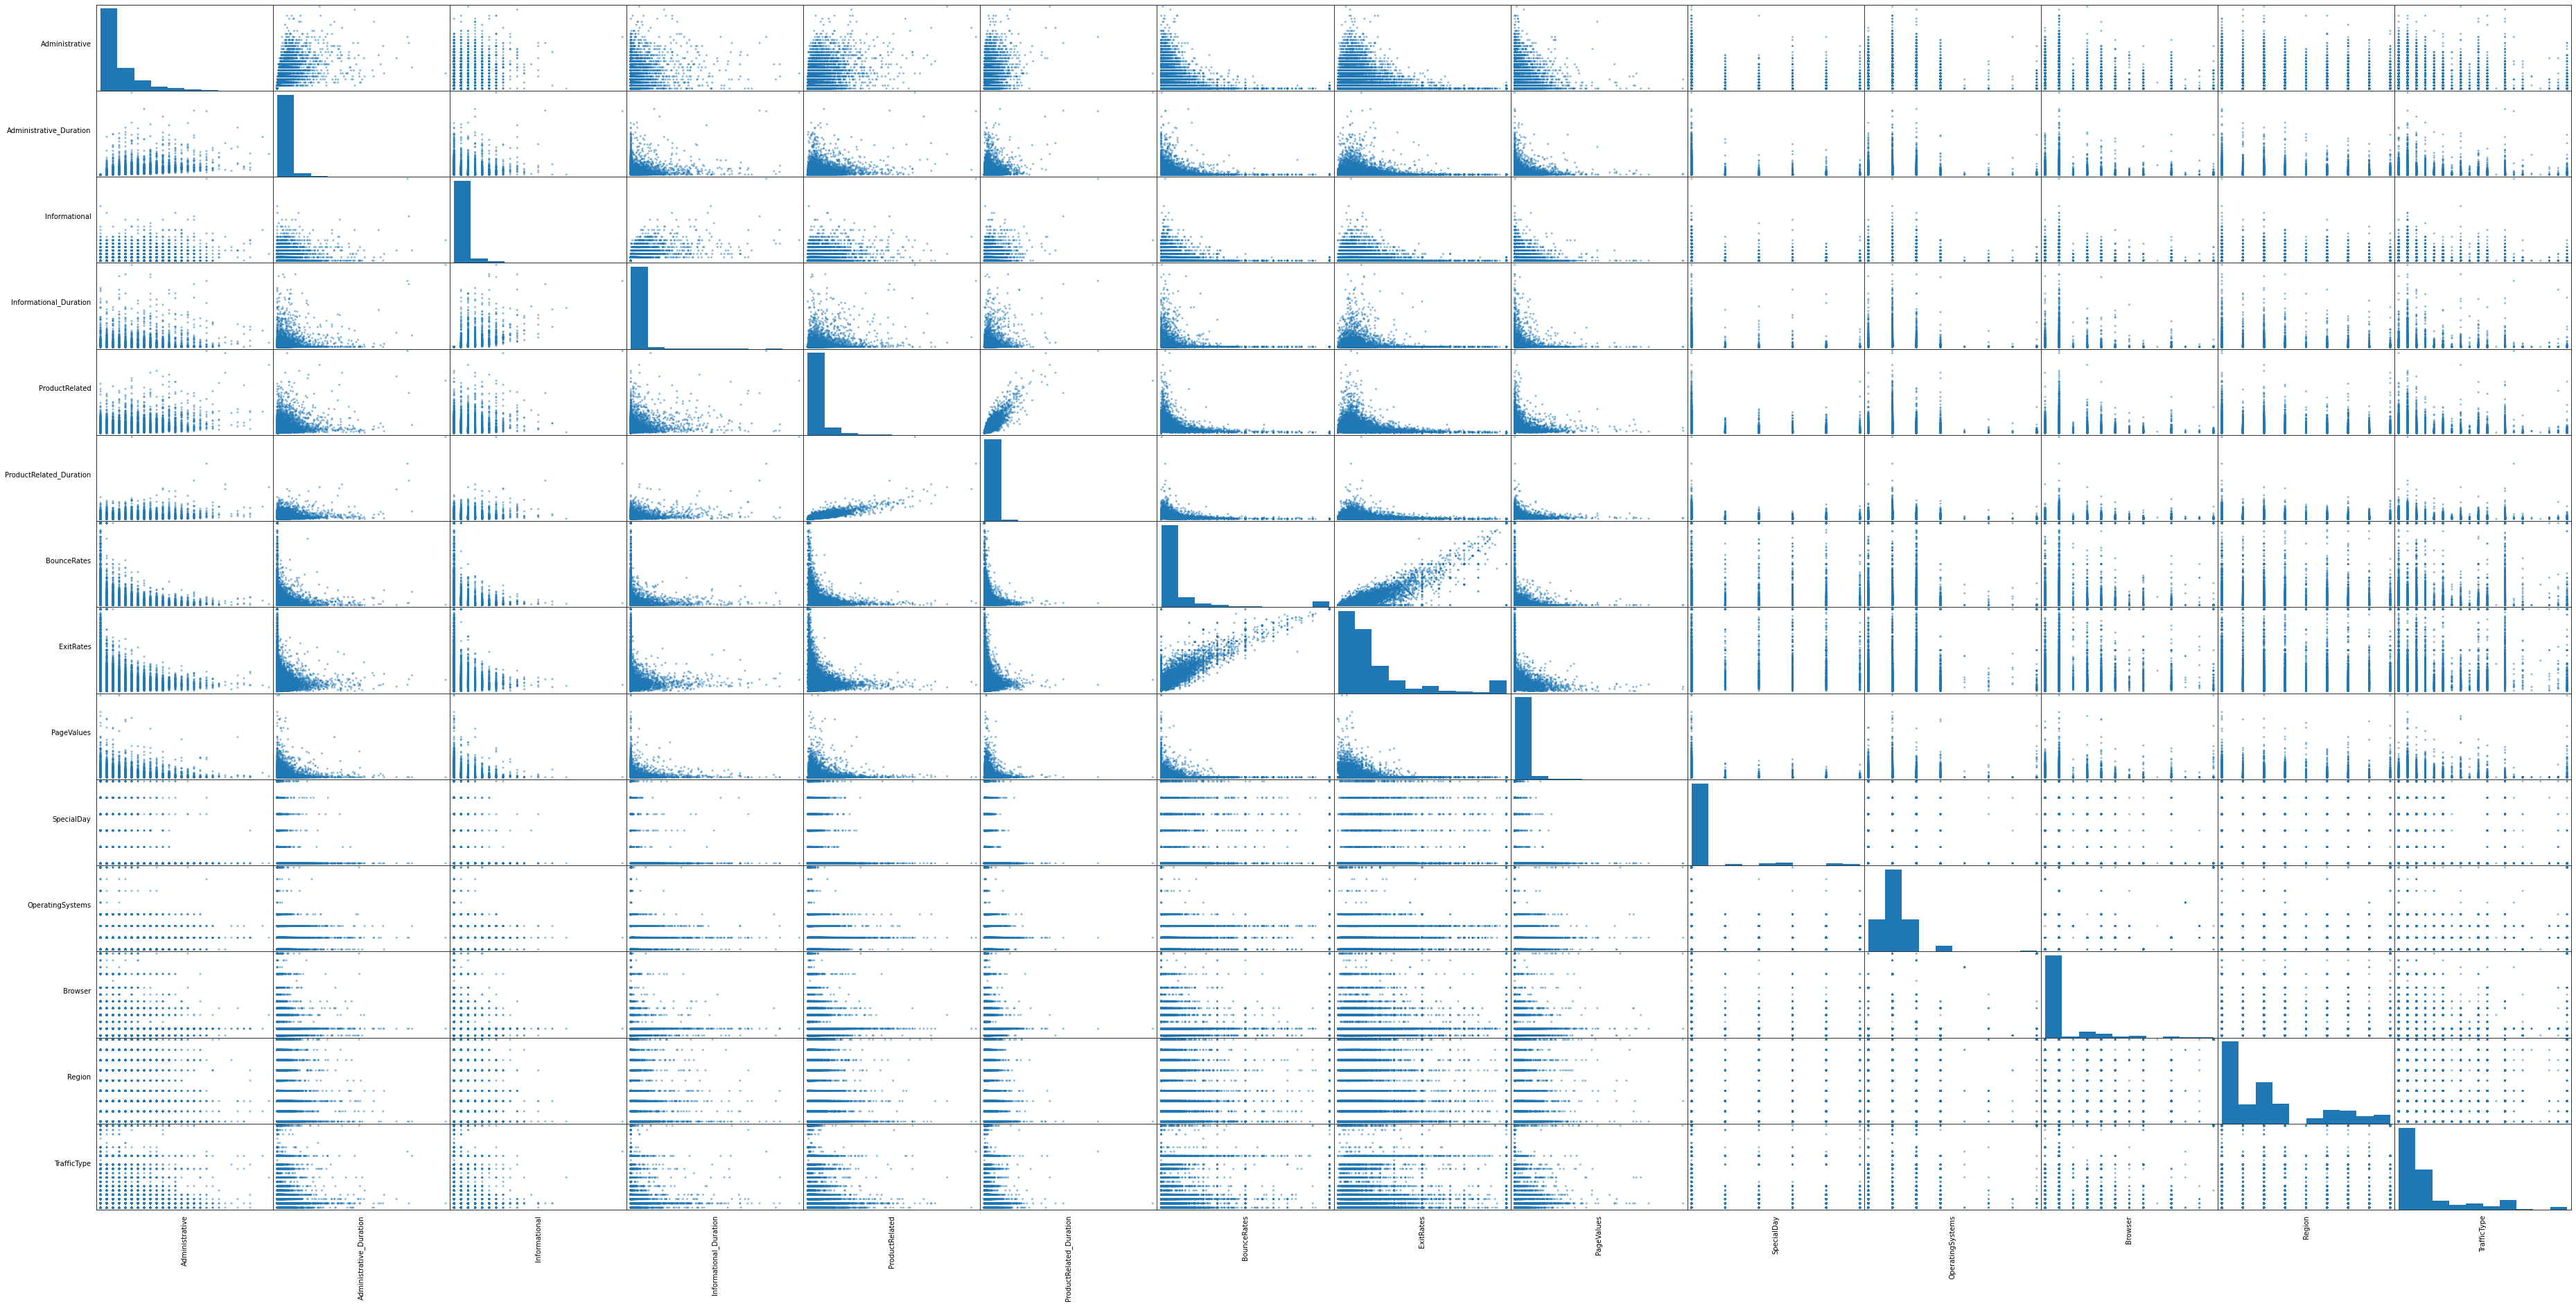

In [16]:
axs = pd.plotting.scatter_matrix(result, figsize=(64, 32));
n = len(result.columns)

for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n - 1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

### Correlation
I couldn't really tell if features were highly correlated in the previous plotting, necessitating the next plot. 

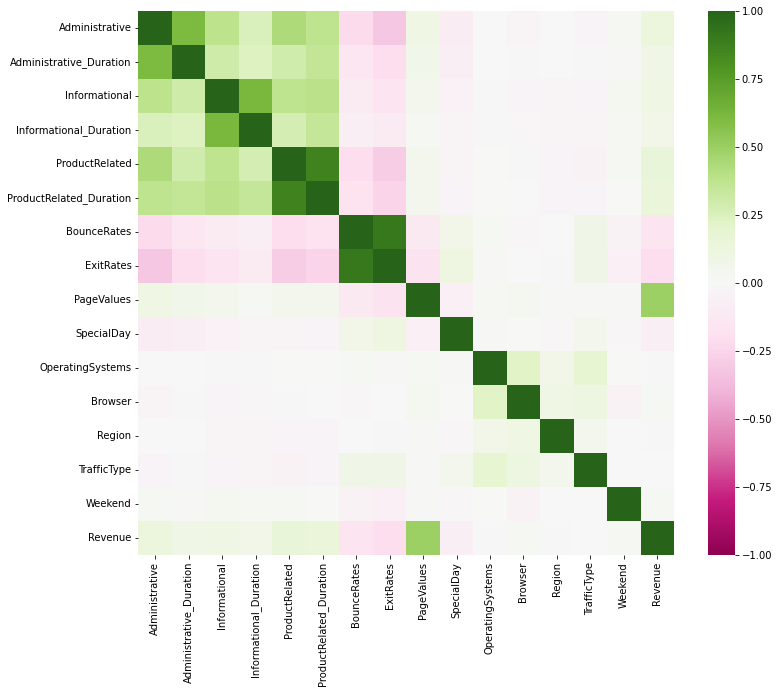

In [17]:
train_small_df = df_work.copy()
plt.figure(figsize=(12, 10))
cor = train_small_df.corr()# YOUR CODE HERE
sns.heatmap(cor, vmin=-1, vmax=1, cmap="PiYG");

### Feature Correlation
- It appears that 'ProductRelated' and 'ProductRelated_Duration' are highly correlated to each other. This makes sense.
- 'BounceRates' and 'ExitRates' are also highly correlated to each other. 

In [18]:
keep_columns = np.full(cor.shape[0], True)
for i in range(cor.shape[0] - 1):
    for j in range(i + 1, cor.shape[0] - 1):
        if (np.abs(cor.iloc[i, j]) >= 0.8):
            keep_columns[j] = False
            if keep_columns[j] == False:
                print(train_small_df.columns[j])

ProductRelated_Duration
ExitRates


In [19]:
train_small_df.columns[5]

'ProductRelated_Duration'

In [20]:
train_small_df.columns[7]

'ExitRates'

### Feature Correlation: 
The proposed features that are highly correlated to each other can be removed. We will remove 'ProductRelated_Duration' and 'Exit_Rates' from the df_train and df_test sets.

In [21]:
df_train_reduced = df_train.drop(columns=['ProductRelated_Duration', 'ExitRates'])
df_train_reduced

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,BounceRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
5455,0,0.000000,0,0.0,1,0.000000,0.000000,0.0,Oct,2,2,1,5,Returning_Visitor,False,False
5456,3,40.200000,0,0.0,11,0.000000,0.000000,0.0,June,2,2,2,1,New_Visitor,False,False
5457,1,63.400000,0,0.0,3,0.000000,42.293068,0.0,Oct,1,1,3,3,New_Visitor,False,True
5458,6,618.066667,0,0.0,50,0.000000,28.068050,0.0,June,2,2,6,11,New_Visitor,False,True
5459,0,0.000000,0,0.0,2,0.000000,0.000000,0.0,June,2,2,7,1,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.000000,0,0.0,53,0.007143,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.000000,0,0.0,5,0.000000,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.000000,0,0.0,6,0.083333,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.000000,0,0.0,15,0.000000,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [23]:
#y_train = df_train_reduced['Revenue'].values

In [24]:
#y_train

array([False, False,  True, ..., False, False, False])

In [26]:
df_test_reduced = df_test.drop(columns=['ProductRelated_Duration', 'ExitRates'])
df_test_reduced

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,BounceRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.20,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,0.00,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.20,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,0.05,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,0.02,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2086,1,78.0,0,0.0,21,0.00,24.750476,0.0,Mar,1,1,1,2,New_Visitor,False,True
2087,0,0.0,0,0.0,19,0.00,0.000000,0.0,Mar,2,4,1,3,Returning_Visitor,True,False
2088,0,0.0,0,0.0,10,0.00,0.000000,0.0,Mar,2,4,7,3,Returning_Visitor,False,False
2089,0,0.0,0,0.0,1,0.20,0.000000,0.0,Mar,3,2,1,3,Returning_Visitor,True,False


In [27]:
#y_test = df_test_reduced['Revenue'].values
#y_test

array([False, False, False, ..., False, False, False])

In [28]:
df_train_reduced['Revenue'] = df_train_reduced['Revenue'].replace({True: 1, False: 0})
df_train_reduced['Weekend'] = df_train_reduced['Weekend'].replace({True: 1, False: 0})
df_train_reduced.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,BounceRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
5455,0,0.000000,0,0.0,1,0.0,0.000000,0.0,Oct,2,2,1,5,Returning_Visitor,0,0
5456,3,40.200000,0,0.0,11,0.0,0.000000,0.0,June,2,2,2,1,New_Visitor,0,0
5457,1,63.400000,0,0.0,3,0.0,42.293068,0.0,Oct,1,1,3,3,New_Visitor,0,1
5458,6,618.066667,0,0.0,50,0.0,28.068050,0.0,June,2,2,6,11,New_Visitor,0,1
5459,0,0.000000,0,0.0,2,0.0,0.000000,0.0,June,2,2,7,1,Returning_Visitor,0,0


In [50]:
y_train = df_train_reduced['Revenue'].values
y_test = df_test_reduced['Revenue'].values
y_train

array([0, 0, 1, ..., 0, 0, 0])

In [29]:
df_train_reduced.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'BounceRates', 'PageValues',
       'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region',
       'TrafficType', 'VisitorType', 'Weekend', 'Revenue'],
      dtype='object')

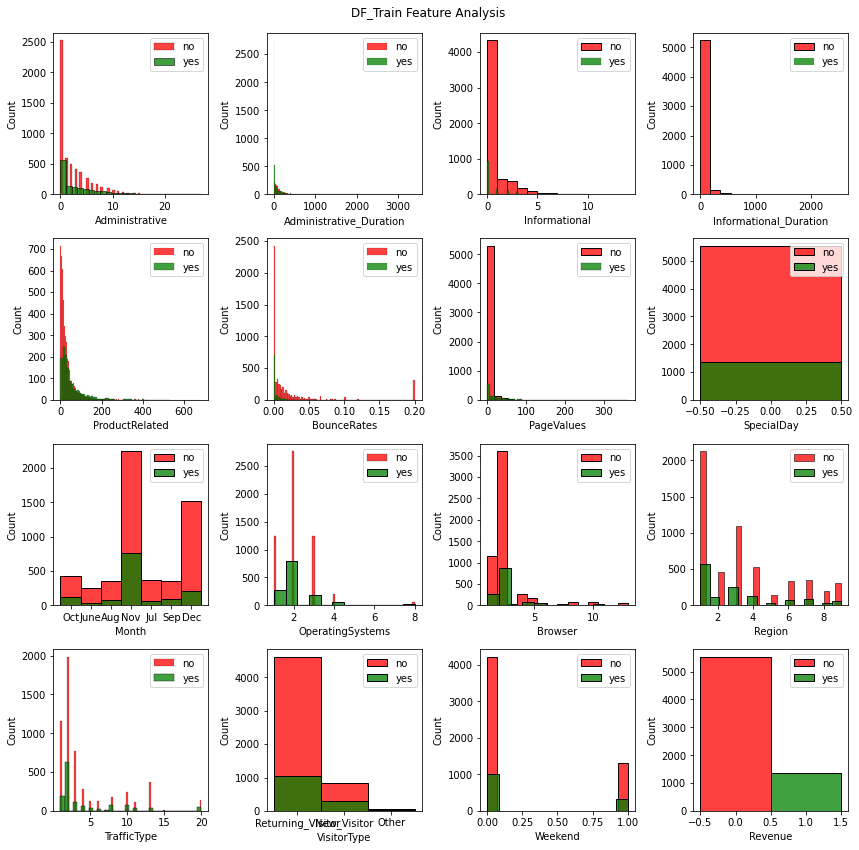

In [30]:
#train_small_df_reduced = train_small_df[selected_columns]
fig = plt.figure(figsize=(12, 12))
j = 0
for i in df_train_reduced.columns:
    plt.subplot(4, 4, j+1)
    j += 1
    sns.histplot(df_train_reduced[i][df_train_reduced['Revenue'] == 0], color='r', label='no')
    sns.histplot(df_train_reduced[i][df_train_reduced['Revenue'] == 1], color='g', label='yes')
    plt.legend(loc='best')
fig.suptitle('DF_Train Feature Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95);


### Specific Tasks

1. Fit a logistic regression and at least one other classification model. Find and explain important features. 
1. Report and interpret the most meaningful classifications metrics
1. Show and explain the hyper-parameter fitting process.

Point breakdown:

- (10 points) Basic exploratory data analysis (EDA) 
    - Appropriate univariate descriptive statistics and figures
    - Appropriate bi-variate descriptive statistics and figures
- ( 5 points) Advanced EDA
    - Free-response, shows us what they know! 
- ( 5 points) Train/test split
- (10 points) Feature selection
- (15 points) Model fitting
- ( 5 points) Performance points 

In [31]:
df_work['Revenue'] = df_work['Revenue'].replace({True: 1, False: 0})
df_work.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,0


In [32]:
df_work['Weekend'] = df_work['Weekend'].replace({True: 1, False: 0})
df_work.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1,0


In [33]:
df_work.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                      int64
Revenue                      int64
dtype: object

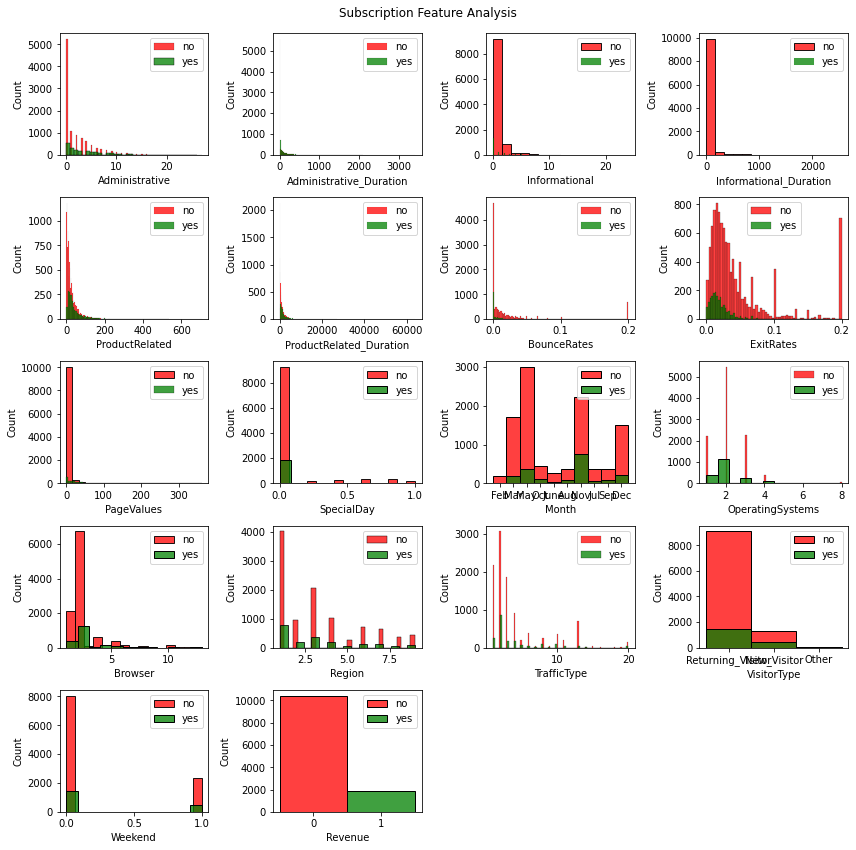

In [34]:
fig = plt.figure(figsize=(12, 12))
j = 0
for i in df_work.columns:
    plt.subplot(5, 4, j+1)
    j += 1
    sns.histplot(df_work[i][df_work['Revenue'] == 0], color='r', label='no')
    sns.histplot(df_work[i][df_work['Revenue'] == 1], color='g', label='yes')
    plt.legend(loc='best')
fig.suptitle('Subscription Feature Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95);

In [35]:
month_str2num = {
    s: i+1 for i, s in enumerate(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
}
df_work['Month'] = df_work['Month'].replace(month_str2num)
df_work.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,Returning_Visitor,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,Returning_Visitor,1,0


In [36]:
vis_str2num = {
    s: i+1 for i, s in enumerate(['Returning_Visitor', 'New_Visitor', 'Other'])
}
df_train_reduced['VisitorType'] = df_train_reduced['VisitorType'].replace(vis_str2num)
df_test_reduced['VisitorType'] = df_test_reduced['VisitorType'].replace(vis_str2num)

In [37]:
df_train_reduced['Month'] = df_train_reduced['Month'].replace(month_str2num)
df_test_reduced['Month'] = df_test_reduced['Month'].replace(month_str2num)

In [38]:
df_train_reduced.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,BounceRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
5455,0,0.000000,0,0.0,1,0.0,0.000000,0.0,10,2,2,1,5,1,0,0
5456,3,40.200000,0,0.0,11,0.0,0.000000,0.0,6,2,2,2,1,2,0,0
5457,1,63.400000,0,0.0,3,0.0,42.293068,0.0,10,1,1,3,3,2,0,1
5458,6,618.066667,0,0.0,50,0.0,28.068050,0.0,6,2,2,6,11,2,0,1
5459,0,0.000000,0,0.0,2,0.0,0.000000,0.0,6,2,2,7,1,1,0,0


In [39]:
df_test_reduced['Revenue'] = df_test_reduced['Revenue'].replace({True: 1, False: 0})
df_test_reduced['Weekend'] = df_test_reduced['Weekend'].replace({True: 1, False: 0})

In [40]:
df_test_reduced.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,BounceRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.20,0.0,0.0,2,1,1,1,1,1,0,0
1,0,0.0,0,0.0,2,0.00,0.0,0.0,2,2,2,1,2,1,0,0
2,0,0.0,0,0.0,1,0.20,0.0,0.0,2,4,1,9,3,1,0,0
3,0,0.0,0,0.0,2,0.05,0.0,0.0,2,3,2,2,4,1,0,0
4,0,0.0,0,0.0,10,0.02,0.0,0.0,2,3,3,1,4,1,1,0


### Logistic Regression Imports

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import (
    confusion_matrix,
    accuracy_score as accuracy,
    recall_score as recall,
    roc_curve, roc_auc_score,
    precision_score as precision,
    f1_score
)

#### Dropping Target Column from train and test seta

In [45]:
df_train_reduced_0 = df_train_reduced.drop(columns=['Revenue'])
df_train_reduced_0

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,BounceRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
5455,0,0.000000,0,0.0,1,0.000000,0.000000,0.0,10,2,2,1,5,1,0
5456,3,40.200000,0,0.0,11,0.000000,0.000000,0.0,6,2,2,2,1,2,0
5457,1,63.400000,0,0.0,3,0.000000,42.293068,0.0,10,1,1,3,3,2,0
5458,6,618.066667,0,0.0,50,0.000000,28.068050,0.0,6,2,2,6,11,2,0
5459,0,0.000000,0,0.0,2,0.000000,0.000000,0.0,6,2,2,7,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.000000,0,0.0,53,0.007143,12.241717,0.0,12,4,6,1,1,1,1
12326,0,0.000000,0,0.0,5,0.000000,0.000000,0.0,11,3,2,1,8,1,1
12327,0,0.000000,0,0.0,6,0.083333,0.000000,0.0,11,3,2,1,13,1,1
12328,4,75.000000,0,0.0,15,0.000000,0.000000,0.0,11,2,2,3,11,1,0


In [159]:
df_test_reduced_0 = df_test_reduced.drop(columns=['Revenue'])
df_test_reduced_0

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,BounceRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,1,0.20,0.000000,0.0,2,1,1,1,1,1,0
1,0,0.0,0,0.0,2,0.00,0.000000,0.0,2,2,2,1,2,1,0
2,0,0.0,0,0.0,1,0.20,0.000000,0.0,2,4,1,9,3,1,0
3,0,0.0,0,0.0,2,0.05,0.000000,0.0,2,3,2,2,4,1,0
4,0,0.0,0,0.0,10,0.02,0.000000,0.0,2,3,3,1,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2086,1,78.0,0,0.0,21,0.00,24.750476,0.0,3,1,1,1,2,2,0
2087,0,0.0,0,0.0,19,0.00,0.000000,0.0,3,2,4,1,3,1,1
2088,0,0.0,0,0.0,10,0.00,0.000000,0.0,3,2,4,7,3,1,0
2089,0,0.0,0,0.0,1,0.20,0.000000,0.0,3,3,2,1,3,1,1


In [160]:
scaler =  MinMaxScaler()
X_train_reduced = scaler.fit_transform(df_train_reduced_0)
X_test_reduced = scaler.transform(df_test_reduced_0)

In [245]:
%%time
lr_model = LogisticRegression(class_weight='balanced')
lr_model.fit(X_train_reduced, y_train)
lr_pred = lr_model.predict(X_test_reduced)

CPU times: user 497 ms, sys: 1.88 s, total: 2.38 s
Wall time: 184 ms


In [246]:
print("accuracy:", accuracy(y_test, lr_pred))
print("precision:", precision(y_test, lr_pred))
print("recall:", recall(y_test, lr_pred))
print("f1 score:", f1_score(y_test, lr_pred))
print("confusion matrix:")
print(confusion_matrix(y_test, lr_pred))

accuracy: 0.9340028694404591
precision: 0.6144578313253012
recall: 0.7846153846153846
f1 score: 0.6891891891891891
confusion matrix:
[[1800   96]
 [  42  153]]


In [254]:
scaler =  StandardScaler()
X_train_reduced = scaler.fit_transform(df_train_reduced_0)
X_test_reduced = scaler.transform(df_test_reduced_0)

In [255]:
%%time
lr_model = LogisticRegression(class_weight='balanced')
lr_model.fit(X_train_reduced, y_train)
lr_pred = lr_model.predict(X_test_reduced)
print("accuracy:", accuracy(y_test, lr_pred))
print("precision:", precision(y_test, lr_pred))
print("recall:", recall(y_test, lr_pred))
print("f1 score:", f1_score(y_test, lr_pred))
print("confusion matrix:")
print(confusion_matrix(y_test, lr_pred))

accuracy: 0.9435676709708274
precision: 0.6558704453441295
recall: 0.8307692307692308
f1 score: 0.7330316742081449
confusion matrix:
[[1811   85]
 [  33  162]]
CPU times: user 90.4 ms, sys: 298 ms, total: 389 ms
Wall time: 32.8 ms


In [220]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

lr = LogisticRegression()
weights = np.linspace(0.0,0.99,400)
# cv = StratifiedKFold(n=x) insert other parameters 10 fold cross validation is about max to use (plenty)
#Creating a dictionary grid for grid search
param_grid = param_lr ={'C': [1, 10], 
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], 
    'max_iter': [100, 110, 120],
    'penalty': ['l2', 'none'], 'class_weight': ['balanced']} 

gridsearch = GridSearchCV(estimator= lr, 
                          param_grid= param_grid, # parameters that are being searched within the grid search, specify more parameters
                          cv=StratifiedKFold(n_splits=10), #specify # of folds 
                          n_jobs=-1, 
                          scoring='f1', 
                          verbose=2).fit(X_train_reduced, y_train)

#Ploting the score for different values of weight

Fitting 10 folds for each of 48 candidates, totalling 480 fits
[CV] END C=1, class_weight=balanced, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=1, class_weight=balanced, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=1, class_weight=balanced, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=100, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=100, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END C=1, class_weight=balanced, max_iter=100, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END C=1, class_weight=balanced, max_iter=100, penalty=none, solver=saga; total time=   0.1s
[CV] END C=1, class_weight=balanced, max_iter=100, penalty=none, solver=saga; total time=   0.2s
[CV] END C=1, class_weight=balanced, max_iter=110, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=1, class_weight=bala

/home/jmwolf/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/jmwolf/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/jmwolf/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/jmwolf/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/jmwolf/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/jmwolf/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.

[CV] END C=1, class_weight=balanced, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END C=1, class_weight=balanced, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=1, class_weight=balanced, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=100, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=100, penalty=none, solver=sag; total time=   0.1s
[CV] END C=1, class_weight=balanced, max_iter=100, penalty=none, solver=sag; total time=   0

/home/jmwolf/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/jmwolf/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/jmwolf/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/jmwolf/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/jmwolf/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/jmwolf/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.

[CV] END C=1, class_weight=balanced, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=1, class_weight=balanced, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=100, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=100, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END C=1, class_weight=balanced, max_iter=100, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END C=1, class_weight=balanced, max_iter=110, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=1, class_weight=balanced, max_iter=110, penalty=l2, solver=newton-cg

In [221]:
#gridsearch.fit(X_train_reduced, y_train)
gridsearch.best_params_

{'C': 10,
 'class_weight': 'balanced',
 'max_iter': 110,
 'penalty': 'l2',
 'solver': 'sag'}

In [222]:
gridsearch.score(X_test_reduced, y_test)

0.726027397260274

In [223]:
grid_predictions = gridsearch.predict(X_test_reduced) 
   
# print classification report 
print(classification_report(y_test, grid_predictions)) 

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1896
           1       0.65      0.82      0.73       195

    accuracy                           0.94      2091
   macro avg       0.82      0.89      0.85      2091
weighted avg       0.95      0.94      0.95      2091

[CV] END C=1, class_weight=balanced, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=1, class_weight=balanced, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=1, class_weight=balanced, max_iter=100, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=1, class_weight=balanced, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=1, class_weight=balanced, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=100, penalty=elasticnet, solve

In [ ]:
print("accuracy:", accuracy(y_test, lr_pred))
print("precision:", precision(y_test, lr_pred))
print("recall:", recall(y_test, lr_pred))
print("f1 score:", f1_score(y_test, lr_pred))
print("confusion matrix:")
print(confusion_matrix(y_test, lr_pred))

In [206]:
score_x = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score']})
len(score_x)

400

In [207]:
weight_x = pd.DataFrame({ 'weight': (1-weights)})
len(weight_x)

400

/home/jmwolf/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Scoring for different class weights')

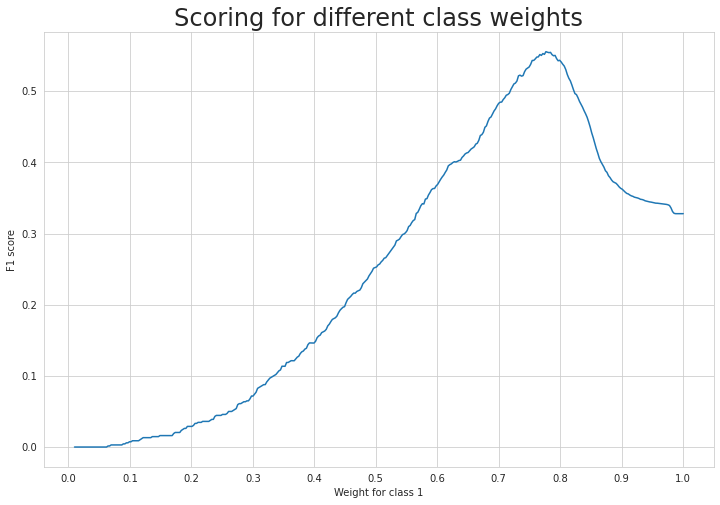

In [208]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1-weights)})
sns.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)

In [209]:
weigh_data.loc[weigh_data['score'].idxmax()]

score     0.555442
weight    0.776692
Name: 90, dtype: float64

In [210]:
weigh_data.loc[weigh_data['weight'].idxmax()]

score     0.327861
weight    1.000000
Name: 0, dtype: float64

In [215]:
%%time
lr = LogisticRegression(class_weight={0: 0.555442, 1: 0.32786})
lr.fit(X_train_reduced, y_train)

# Predicting on the test data
lr_pred = lr.predict(X_test_reduced)

CPU times: user 288 ms, sys: 1.07 s, total: 1.36 s
Wall time: 101 ms


In [216]:
print("accuracy:", accuracy(y_test, lr_pred))
print("precision:", precision(y_test, lr_pred))
print("recall:", recall(y_test, lr_pred))
print("f1 score:", f1_score(y_test, lr_pred))
print("confusion matrix:")
print(confusion_matrix(y_test, lr_pred))

accuracy: 0.9120038259206121
precision: 0.9230769230769231
recall: 0.06153846153846154
f1 score: 0.11538461538461539
confusion matrix:
[[1895    1]
 [ 183   12]]


In [ ]:
# param_lr ={'C': [1, 10], 
# 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
# 'max_iter': [100, 110, 120],
# 'penalty': ['l2', 'elasticnet', 'none’]} 

# param_lr ={'C': [1, 10], 
# 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
# 'max_iter': [100, 110, 120],
# 'penalty': ['l2', 'elasticnet', 'none’], ‘class_weight’: [‘balanced’]} 

# after grid search, best estimator going to give metrics of each model
# feature importance in best estimator
# investigate more methods in grid search

In [179]:
weigh_data.loc[weigh_data['score'].idxmax()]

score     0.561544
weight    0.781106
Name: 44, dtype: float64

In [180]:
weigh_data.loc[weigh_data['weight'].idxmax()]

score     0.32786
weight    1.00000
Name: 0, dtype: float64

In [98]:
weigh_data.loc[weigh_data['score'].idxmax()]

score     0.553878
weight    0.776131
Name: 45, dtype: float64

In [99]:
weigh_data.loc[weigh_data['weight'].idxmax()]

score     0.327861
weight    1.000000
Name: 0, dtype: float64

In [101]:
%%time
lr = LogisticRegression(class_weight={0: 0.327861, 1: 0.776131})
lr.fit(X_train_reduced, y_train)

# Predicting on the test data
lr_pred = lr.predict(X_test_reduced)

CPU times: user 71.4 ms, sys: 465 ms, total: 536 ms
Wall time: 39.5 ms


In [103]:
print("accuracy:", accuracy(y_test, lr_pred))
print("precision:", precision(y_test, lr_pred))
print("recall:", recall(y_test, lr_pred))
print("f1 score:", f1_score(y_test, lr_pred))
print("confusion matrix:")
print(confusion_matrix(y_test, lr_pred))

accuracy: 0.9349593495934959
precision: 0.743801652892562
recall: 0.46153846153846156
f1 score: 0.569620253164557
confusion matrix:
[[1865   31]
 [ 105   90]]


In [247]:
%%time
lr = LogisticRegression(random_state=13, class_weight=None)
lr.fit(X_train_reduced, y_train)

# Predicting on the test data
lr_pred = lr.predict(X_test_reduced)

print("accuracy:", accuracy(y_test, lr_pred))
print("precision:", precision(y_test, lr_pred))
print("recall:", recall(y_test, lr_pred))
print("f1 score:", f1_score(y_test, lr_pred))
print(f'Area Under Curve: {roc_auc_score(y_test, lr_pred)}')
print("confusion matrix:")
print(confusion_matrix(y_test, lr_pred))

accuracy: 0.9258727881396461
precision: 0.8333333333333334
recall: 0.2564102564102564
f1 score: 0.392156862745098
Area Under Curve: 0.6255679974034405
confusion matrix:
[[1886   10]
 [ 145   50]]
CPU times: user 305 ms, sys: 1 s, total: 1.31 s
Wall time: 102 ms


In [100]:
%%time
lr_model = LogisticRegression(class_weight='balanced')
lr_model.fit(X_train_reduced, y_train)
lr_pred = lr_model.predict(X_test_reduced)

print("accuracy:", accuracy(y_test, lr_pred))
print("precision:", precision(y_test, lr_pred))
print("recall:", recall(y_test, lr_pred))
print("f1 score:", f1_score(y_test, lr_pred))
print("confusion matrix:")
print(confusion_matrix(y_test, lr_pred))

accuracy: 0.9340028694404591
precision: 0.6144578313253012
recall: 0.7846153846153846
f1 score: 0.6891891891891891
confusion matrix:
[[1800   96]
 [  42  153]]
CPU times: user 213 ms, sys: 524 ms, total: 737 ms
Wall time: 53.9 ms


### Classification Report from using GridSearch

In [224]:
print(classification_report(y_test, grid_predictions)) 

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1896
           1       0.65      0.82      0.73       195

    accuracy                           0.94      2091
   macro avg       0.82      0.89      0.85      2091
weighted avg       0.95      0.94      0.95      2091



In [ ]:
# try random forest can make a grid search with rf

In [243]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier()

model.fit(X_train_reduced,y_train)

y_pred=model.predict(X_test_reduced)

In [244]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9473935915829746
F1: 0.6726190476190477
Precision: 0.8014184397163121
Recall: 0.5794871794871795


In [252]:
%%time
from sklearn.ensemble import GradientBoostingClassifier

gbt_model = GradientBoostingClassifier(random_state=42)# YOUR CODE HERE
gbt_model.fit(X_train_reduced, y_train)
gbt_pred = gbt_model.predict(X_test_reduced)

CPU times: user 723 ms, sys: 0 ns, total: 723 ms
Wall time: 733 ms


In [253]:
gbt_model.score(X_test_reduced, y_test)
predictions = gbt_model.predict(X_test_reduced)

0.943089430894309

### Model Performance Thoughts:

After running a few different implementations of the logisitc regression model, the model that I used that has 'class_weight='balanced' returns the better scores versus a default logistic regression. Even running GridSearch to find the 'ideal' class weightings, doesn't return as high of scores. Though precision and recall appear to have an inverse relationship to where one increases and the other decreases. Seeing that the F1 score in the balanced weights is higher, this would indicted that the Balanced weights model is the better model to use though it is not better by much.    
- GridSearch: 
    - accuracy: 0.9349593495934959
    - precision: 0.743801652892562
    - recall: 0.46153846153846156
    - f1 score: 0.569620253164557
- Balanced weights:
    - accuracy: 0.9340028694404591
    - precision: 0.6144578313253012
    - recall: 0.7846153846153846
    - f1 score: 0.6891891891891891

##  Task 2. Customer Segmentation (25 points)

Generate user-behavior clusters based on the purchasing behavior data for the complete dataset. 

1. How many clusters do you see? What are the significant differences between the various clusters in terms of the size of the clusters and purchase ratio. Perform as detailed analysis of the clusters as you can.
2. Return plots and cluster images generated for the data.
3. Perform a detailed analysis for each cluster corresponding to the variations in features and identify some behaviors corresponding to each particular cluster (e.g., which cluster represent new shoppers vs. brand conscious shoppers etc.).

Point breakdown:

- (15 points) Clustering code
- (10 points) Clustering analysis

### Customers
- Returning_users = brand conscious customers
- New_users = new shoppers

In [56]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [57]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [58]:
df[['Revenue']].value_counts()

Revenue
False      10422
True        1908
dtype: int64

In [59]:
percent = df[['Revenue']].value_counts()[1]/sum([df['Revenue'].value_counts()[0], df['Revenue'].value_counts()[1]])
print(f"{percent:.02%}")

15.47%


In [275]:
df_reduced = df.copy()
df_reduced

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [276]:
df_reduced['Month'] = df['Month'].replace(month_str2num)
df_reduced['VisitorType'] = df['VisitorType'].replace(vis_str2num)
df_reduced['Revenue'] = df['Revenue'].replace({True: 1, False: 0})
df_reduced['Weekend'] = df['Weekend'].replace({True: 1, False: 0})
df_reduced

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,1,1,1,1,1,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,2,1,2,1,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,4,1,9,3,1,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,2,3,2,2,4,1,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,2,3,3,1,4,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,12,4,6,1,1,1,1,0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,11,3,2,1,8,1,1,0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,11,3,2,1,13,1,1,0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,11,2,2,3,11,1,0,0


In [277]:
y = df_reduced.pop('Revenue')

In [278]:
df_reduced_0 = df_reduced.copy()
df_reduced_0

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,1,1,1,1,1,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,2,1,2,1,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,4,1,9,3,1,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,2,3,2,2,4,1,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,2,3,3,1,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,12,4,6,1,1,1,1
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,11,3,2,1,8,1,1
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,11,3,2,1,13,1,1
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,11,2,2,3,11,1,0


In [279]:
df_reduced_0.drop(df[df['Month'] == 'Feb'].index, inplace = True)
df_reduced_0.drop(df[df['Month'] == 'Mar'].index, inplace = True)
df_reduced_0.drop(df[df['Month'] == 'May'].index, inplace = True)

In [287]:
df_reduced_1 = df_test.copy()
df_reduced_1

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2086,1,78.0,0,0.0,21,555.894444,0.00,0.002381,24.750476,0.0,Mar,1,1,1,2,New_Visitor,False,True
2087,0,0.0,0,0.0,19,429.633333,0.00,0.005263,0.000000,0.0,Mar,2,4,1,3,Returning_Visitor,True,False
2088,0,0.0,0,0.0,10,111.000000,0.00,0.020000,0.000000,0.0,Mar,2,4,7,3,Returning_Visitor,False,False
2089,0,0.0,0,0.0,1,0.000000,0.20,0.200000,0.000000,0.0,Mar,3,2,1,3,Returning_Visitor,True,False


In [289]:
df_reduced_1['Month'] = df['Month'].replace(month_str2num)
df_reduced_1['VisitorType'] = df['VisitorType'].replace(vis_str2num)
df_reduced_1['Revenue'] = df['Revenue'].replace({True: 1, False: 0})
df_reduced_1['Weekend'] = df['Weekend'].replace({True: 1, False: 0})
df_reduced_1

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.200000,0.000000,0.0,2,1,1,1,1,1,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.100000,0.000000,0.0,2,2,2,1,2,1,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.200000,0.000000,0.0,2,4,1,9,3,1,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.140000,0.000000,0.0,2,3,2,2,4,1,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.050000,0.000000,0.0,2,3,3,1,4,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2086,1,78.0,0,0.0,21,555.894444,0.00,0.002381,24.750476,0.0,3,1,1,1,2,2,0,1
2087,0,0.0,0,0.0,19,429.633333,0.00,0.005263,0.000000,0.0,3,2,4,1,3,1,1,0
2088,0,0.0,0,0.0,10,111.000000,0.00,0.020000,0.000000,0.0,3,2,4,7,3,1,0,0
2089,0,0.0,0,0.0,1,0.000000,0.20,0.200000,0.000000,0.0,3,3,2,1,3,1,1,0


In [260]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca_pipeline = make_pipeline(StandardScaler(), PCA(whiten=True)) # n_components=5,
df_reduced = pca_pipeline.fit_transform(df_reduced)

In [152]:
# investigate how to write PCA code to use 80-85% of data, component specification isn't explicit 
# 80-85% of data should be explained with PCA, idea is to not lose more than 15% of data features
# normalize data before PCA 
# scaler finds mean and deviation of data hence needing to split data prior to scaling
# sklearn function pipeline (investigate)
# test data does not get fit 

# data -> (split data) -> scale -> PCA -> reduced data -> cluster

In [118]:
df_reduced.shape

(12330, 5)

In [119]:
pca = pca_pipeline.named_steps['pca']
print(pca.explained_variance_ratio_)

[0.20259583 0.10623396 0.08712596 0.07176645 0.06457609]


In [261]:
pca = pca_pipeline.named_steps['pca']
print(pca.explained_variance_ratio_)

[0.2 0.2 0.2 0.2 0.2]


In [120]:
import matplotlib.pyplot as plt

def visualize_2pcs(pcs, y):
    fig, ax = plt.subplots()
    plot = plt.scatter(pcs[:,0], pcs[:,1], c=y) 
    ax.legend(
        handles=plot.legend_elements()[0], 
        labels=['No', 'Yes'])

In [121]:
def visualize_3pcs(pcs, y):
    fig, ax = plt.subplots()
    ax = fig.add_subplot(projection='3d')
    plot = ax.scatter(pcs[:,0], pcs[:,1], pcs[:,2], c=y)
    ax.legend(
        handles=plot.legend_elements()[0], 
        labels=['No', 'Yes'])

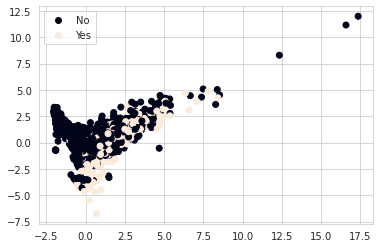

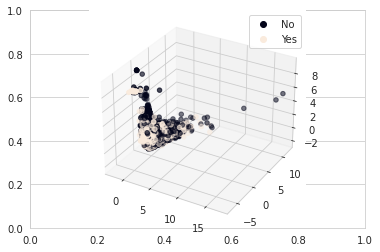

In [122]:
visualize_2pcs(df_reduced, y)
visualize_3pcs(df_reduced, y)

In [125]:
from sklearn.metrics import classification_report

def train(X_train, X_test, y_train, y_test, standardize = True) -> None:
    
    scaler = StandardScaler()
    
    if standardize == True:
        my_pipeline = make_pipeline(scaler, LogisticRegression(class_weight='balanced').fit(X_train, y_train))


    my_pipeline.fit(X_train, y_train)
    #results = model.predict(X_test)
    target_names = ['No', 'Yes']
    y_pred = my_pipeline.predict(X_test)
    print(classification_report(y_test, y_pred, target_names=target_names))

In [126]:
train(X_train_reduced, X_test_reduced, y_train, y_test)

              precision    recall  f1-score   support

          No       0.98      0.96      0.97      1896
         Yes       0.66      0.83      0.73       195

    accuracy                           0.94      2091
   macro avg       0.82      0.89      0.85      2091
weighted avg       0.95      0.94      0.95      2091



In [128]:
from sklearn.cluster import KMeans

def visualize_elbow(X, ks):
    fig, ax = plt.subplots()
    inertias = []
    for k in ks:
        my_cluster = KMeans(n_clusters=k, random_state=10).fit(X)
        #my_cluster.fit(X)
        inertias.append(my_cluster.inertia_)
        
    plt.plot(ks, inertias)
    plt.xticks(ks)
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow plot')

In [ ]:
# library that uses elbow visualization (elbow visualizer)
# kmeans elbow visualizer <- use this instead of what is implemented
# find different ways to plot clustering result
# optional, look up ways to plot only 2 of the pca components to show good clustering results

## Test and Experimentation

### PCA Dataframe

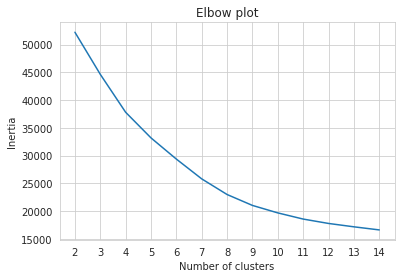

In [132]:
visualize_elbow(df_reduced, ks = [i for i in range(2, 15)])

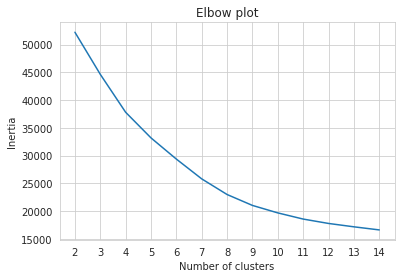

In [262]:
visualize_elbow(df_reduced, ks = [i for i in range(2, 15)])

### MinMaxScaler

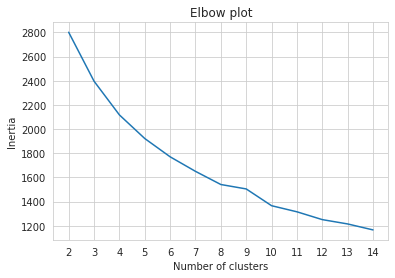

In [131]:
visualize_elbow(X_train_reduced, ks = [i for i in range(2, 15)])

### StandardScaler

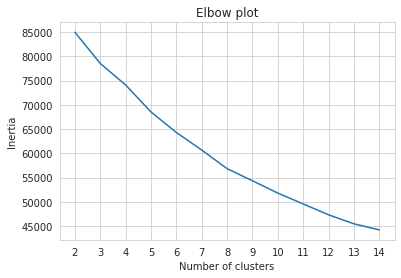

In [256]:
visualize_elbow(X_train_reduced, ks = [i for i in range(2, 15)])

In [134]:
km = 8
kmeans = KMeans(n_clusters=km, random_state=10)
kmeans.fit(df_reduced)

KMeans(random_state=10)

In [136]:
labels = kmeans.labels_
labels_count = [0]*8
for x in labels:
    labels_count[x] += 1
for x in range(len(labels_count)):
    print(f"Cluster: {x}, Count: {labels_count[x]}")

Cluster: 0, Count: 1913
Cluster: 1, Count: 3740
Cluster: 2, Count: 937
Cluster: 3, Count: 828
Cluster: 4, Count: 436
Cluster: 5, Count: 878
Cluster: 6, Count: 61
Cluster: 7, Count: 3537


In [137]:
df_past = df.copy()
df_past

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [139]:
df_past['cluster_pca'] = labels
df_past.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,cluster_pca
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False,5
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False,7
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False,5
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False,7
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False,7


In [144]:
df_past['Month'] = df_past['Month'].replace(month_str2num)
df_past['VisitorType'] = df_past['VisitorType'].replace(vis_str2num)
df_past['Revenue'] = df_past['Revenue'].replace({True: 1, False: 0})
df_past['Weekend'] = df_past['Weekend'].replace({True: 1, False: 0})

In [145]:
tmp = df_past.groupby('cluster_pca').describe().T
tmp.head()

cluster_pca                     0            1           2           3  \
Administrative count  1913.000000  3740.000000  937.000000  828.000000   
               mean      2.911134     1.923529    1.124867    7.287440   
               std       2.949088     2.734490    2.202948    4.735519   
               min       0.000000     0.000000    0.000000    0.000000   
               25%       0.000000     0.000000    0.000000    4.000000   

cluster_pca                    4           5          6            7  
Administrative count  436.000000  878.000000  61.000000  3537.000000  
               mean     6.607798    0.039863   1.770492     1.603336  
               std      4.937293    0.316056   2.734919     2.365409  
               min      0.000000    0.000000   0.000000     0.000000  
               25%      3.000000    0.000000   0.000000     0.000000

In [146]:
tmp.loc['Revenue', :]

cluster_pca,0,1,2,3,4,5,6,7
count,1913.000000,3740.000000,937.000000,828.000000,436.000000,878.000000,61.000000,3537.000000
mean,0.307371,0.149733,0.059765,0.243961,0.341743,0.004556,0.278689,0.093865
std,0.461525,0.356857,0.237178,0.429729,0.474839,0.067381,0.452075,0.291682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


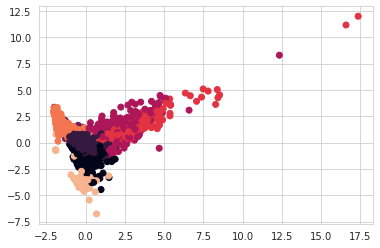

In [149]:
f = plt.figure()
plt.scatter(df_reduced[:, 0], df_reduced[:, 1], c=df_past.cluster_pca);

In [150]:
pd.DataFrame(df_reduced).describe()

,0,1,2,3,4
count,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04
mean,9.220344e-18,2.766103e-17,3.688137e-17,-1.106441e-16,-1.844069e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.025180e+00,-6.768350e+00,-2.192844e+00,-3.174847e+00,-7.573274e+00
25%,-5.031477e-01,-5.059514e-01,-5.979578e-01,-6.590357e-01,-5.209074e-01
50%,-1.461071e-01,-1.374374e-01,-1.121291e-01,-1.316329e-01,-6.555567e-03
75%,3.499768e-01,3.475290e-01,4.547794e-01,4.899400e-01,4.634892e-01
max,1.735166e+01,1.198280e+01,9.410941e+00,4.770333e+00,8.740322e+00


In [151]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples = 15)
dbclusters = dbscan.fit_predict(df_reduced)

df_past['dbclusters'] = dbclusters
df_past.groupby('dbclusters').describe().T.loc['Revenue', :]

dbclusters,-1,0,1,2
count,2627.000000,569.000000,9108.000000,26.000000
mean,0.216978,0.003515,0.146574,0.038462
std,0.412266,0.059235,0.353701,0.196116
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


In [263]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [360]:
db = DBSCAN(eps=1, min_samples=70).fit(X_train_reduced)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [361]:
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y_train, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y_train, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y_train, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(y_train, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(y_train, labels)
)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_train_reduced, labels))

Estimated number of clusters: 2
Estimated number of noise points: 5992
Homogeneity: 0.010
Completeness: 0.011
V-measure: 0.011
Adjusted Rand Index: -0.057
Adjusted Mutual Information: 0.011
Silhouette Coefficient: -0.195


In [ ]:
# db.fit_predict(df_reduced_0, y_train)

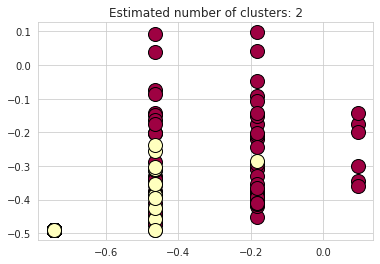

In [383]:
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X_train_reduced[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X_train_reduced[class_member_mask & ~core_samples_mask]
    #plt.plot(
    #    xy[:, 0],
    #    xy[:, 1],
    #    "o",
    #    markerfacecolor=tuple(col),
    #    markeredgecolor="k",
    #    markersize=6,
    #)

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

## Task 3

## Task 3. Semi-Supervised Learning (15 points)
Consider you have training data with the `Revenue` attribute for records from June—September only. For all records from October—December, however, `Revenue` attribute is missing. Build a semi-supervised self-labeling model to estimate `Revenue` for the missing records in October—December and then fit your classifier. Report classification performance on February—March data set with and without the self-labeled data.

1. If you do not consider the records from October—December, generate the classification performance on test data
2. After using the self-labeled data and training data together, does the classification performance on test data improve? Discuss which metrics are most important for your conclusion.

In [296]:
# use label spreading 
df_t3 = df.copy()
df_t3

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [313]:
df_train_sup = df_t3.copy()
df_train_sup

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [314]:
dft_t0 = df_t3[df_t3['Month'] == 'Feb']
dft_t1 = df_t3[df_t3['Month'] == 'Mar']
dft_test = pd.concat([dft_t0, dft_t1])

In [315]:
dft_test

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2086,1,78.0,0,0.0,21,555.894444,0.00,0.002381,24.750476,0.0,Mar,1,1,1,2,New_Visitor,False,True
2087,0,0.0,0,0.0,19,429.633333,0.00,0.005263,0.000000,0.0,Mar,2,4,1,3,Returning_Visitor,True,False
2088,0,0.0,0,0.0,10,111.000000,0.00,0.020000,0.000000,0.0,Mar,2,4,7,3,Returning_Visitor,False,False
2089,0,0.0,0,0.0,1,0.000000,0.20,0.200000,0.000000,0.0,Mar,3,2,1,3,Returning_Visitor,True,False


In [316]:
df_train_sup.drop(df_train_sup[df_train_sup['Month'] == 'Feb'].index, inplace = True)
df_train_sup.drop(df_train_sup[df_train_sup['Month'] == 'Mar'].index, inplace = True)
df_train_sup.drop(df_train_sup[df_train_sup['Month'] == 'May'].index, inplace = True)

In [370]:
df_train_sup.shape

(6875, 18)

In [363]:
np.nan

nan

In [374]:
df_train_sup.iloc[[0]]['Month']

5455    Oct
Name: Month, dtype: object

In [376]:
df_train_sup['Month'] = df_train_sup['Month'].replace(month_str2num)
df_train_sup['VisitorType'] = df_train_sup['VisitorType'].replace(vis_str2num)
df_train_sup['Revenue'] = df_train_sup['Revenue'].replace({True: 1, False: 0})
df_train_sup['Weekend'] = df_train_sup['Weekend'].replace({True: 1, False: 0})
df_train_sup

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
5455,0,0.000000,0,0.0,1,207.570248,0.000000,0.007937,0.000000,0.0,10,2,2,1,5,1,0,0
5456,3,40.200000,0,0.0,11,201.133333,0.000000,0.020000,0.000000,0.0,6,2,2,2,1,2,0,0
5457,1,63.400000,0,0.0,3,120.400000,0.000000,0.000000,42.293068,0.0,10,1,1,3,3,2,0,1
5458,6,618.066667,0,0.0,50,1342.083333,0.000000,0.004386,28.068050,0.0,6,2,2,6,11,2,0,1
5459,0,0.000000,0,0.0,2,7.000000,0.000000,0.100000,0.000000,0.0,6,2,2,7,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.000000,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,12,4,6,1,1,1,1,0
12326,0,0.000000,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,11,3,2,1,8,1,1,0
12327,0,0.000000,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,11,3,2,1,13,1,1,0
12328,4,75.000000,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,11,2,2,3,11,1,0,0


In [397]:
#October—December
#tmp = df_train_sup.iloc[[x]]['Month']
#tmp
for x in range(6875):
    #tmp = int(df_train_sup.iloc[[x]]['Month'])
    #print(tmp)
        #print(1)
    if int(df_train_sup.iloc[[x]]['Month']) == 10 | 11 | 12:
        int(df_train_sup.ilo[[x]]['Revenue']) == np.nan

In [ ]:
#df_reduced_1['Month'] = df['Month'].replace(month_str2num)
#df_reduced_1['VisitorType'] = df['VisitorType'].replace(vis_str2num)
#df_reduced_1['Revenue'] = df['Revenue'].replace({True: 1, False: 0})
#df_reduced_1['Weekend'] = df['Weekend'].replace({True: 1, False: 0})
#df_reduced_1

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.semi_supervised import LabelSpreading

label_prop_model = LabelSpreading()
#iris = datasets.load_iris()
rng = np.random.RandomState(42)
random_unlabeled_points = rng.rand(len(iris.target)) < 0.3
labels = np.copy(iris.target)
labels[random_unlabeled_points] = -1
label_prop_model.fit(iris.data, labels)
LabelSpreading(...)